### Salary Dataset For Linear Regression

In [5]:
# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as gb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('\Salary_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
# remove first column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Text(0, 0.5, 'Salary')

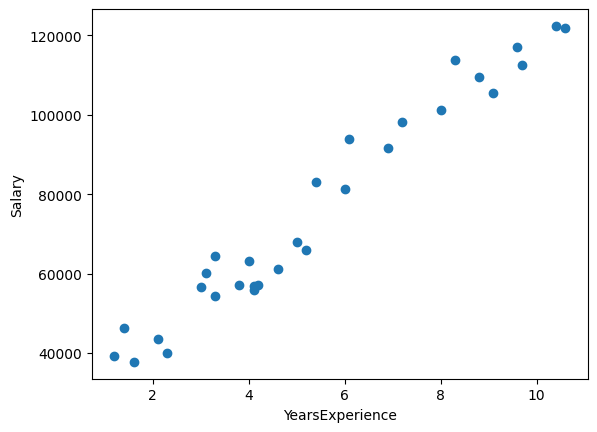

In [22]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

<Axes: >

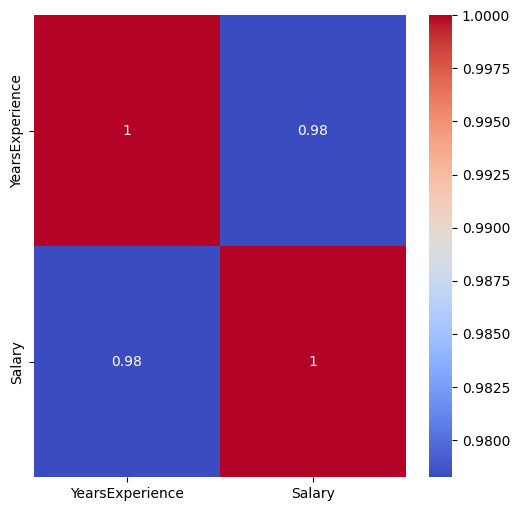

In [23]:
matrix=df.corr(method='pearson')
plt.figure(figsize=(6,6))
sns.heatmap(matrix,annot=True,cmap='coolwarm')

<Axes: >

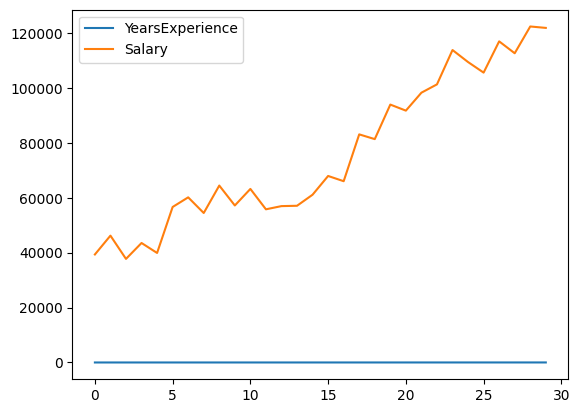

In [24]:
df.plot()

In [25]:
cn = df.corr()
cn

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [26]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [27]:
x, y

(    YearsExperience
 0               1.2
 1               1.4
 2               1.6
 3               2.1
 4               2.3
 5               3.0
 6               3.1
 7               3.3
 8               3.3
 9               3.8
 10              4.0
 11              4.1
 12              4.1
 13              4.2
 14              4.6
 15              5.0
 16              5.2
 17              5.4
 18              6.0
 19              6.1
 20              6.9
 21              7.2
 22              8.0
 23              8.3
 24              8.8
 25              9.1
 26              9.6
 27              9.7
 28             10.4
 29             10.6,
 0      39344.0
 1      46206.0
 2      37732.0
 3      43526.0
 4      39892.0
 5      56643.0
 6      60151.0
 7      54446.0
 8      64446.0
 9      57190.0
 10     63219.0
 11     55795.0
 12     56958.0
 13     57082.0
 14     61112.0
 15     67939.0
 16     66030.0
 17     83089.0
 18     81364.0
 19     93941.0
 20     91739.0
 21     9827

In [28]:
# training and testing the data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2 , random_state=0)

In [29]:
x_train.shape, x_test.shape

((24, 1), (6, 1))

In [30]:
y_train.shape, y_test.shape

((24,), (6,))

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
x_test

,YearsExperience
2,1.6
28,10.4
13,4.2
10,4.0
26,9.6
24,8.8


In [34]:
y_test

,Salary
2,37732.0
28,122392.0
13,57082.0
10,63219.0
26,116970.0
24,109432.0


In [35]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [36]:
model.predict([[2.5]])

array([49131.27945478])

In [37]:
model.predict([[1.5]])

array([39818.70432805])

In [38]:
model.predict([[3.5]])

array([58443.85458151])

Text(0, 0.5, 'Salary')

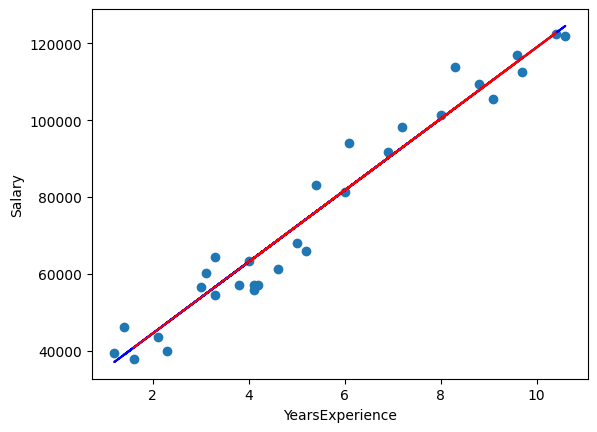

In [39]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
# plt.plot(x_train, y_train_pred, color= 'blue')
# plt.plot(x_test, y_test_pred, color= 'red')
plt.plot(x_train, model.predict(x_train), color= 'blue')
plt.plot(x_test, model.predict(x_test), color= 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

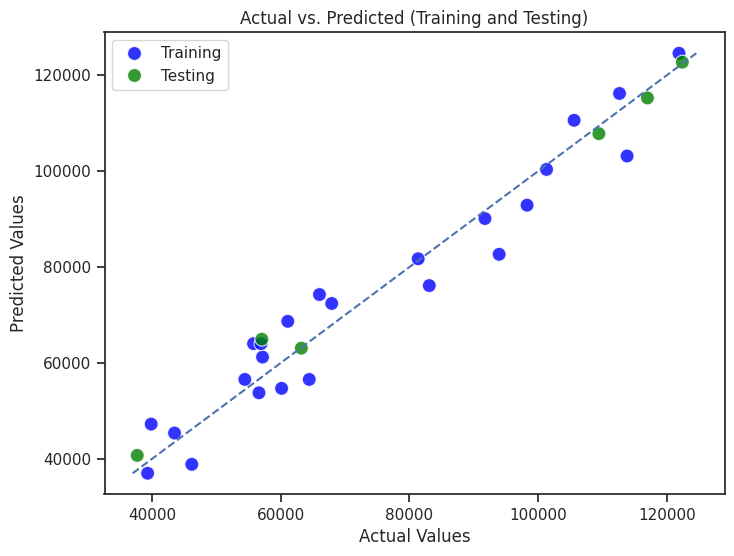

In [40]:
# Create a DataFrame for plotting
combined_data = pd.DataFrame({
    'Actual': np.concatenate((y_train, y_test)),
    'Predicted': np.concatenate((y_train_pred, y_test_pred)),
    'Dataset': ['Training'] * len(y_train) + ['Testing'] * len(y_test)
})

sns.set(style='ticks')
plt.figure(figsize=(8, 6))
palette = {'Training': 'blue', 'Testing': 'green'}
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8, palette=palette)

plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    'b--'
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')

plt.legend()
plt.grid(False)
plt.show()

In [41]:
m = model.coef_
m

array([9312.57512673])

In [42]:
b = model.intercept_
b

25849.841637955273

In [43]:
minimum_salary = int(b)
minimum_salary

25849

In [44]:
y = m * x_test.iloc[3].values.reshape(1, -1) + b
y

array([[63100.14214487]])

In [45]:
r2 = r2_score
r2

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [46]:
r2 = r2_score(y_test, y_test_pred)
r2

0.988169515729126

In [47]:
r2 = r2_score(y_train, y_train_pred)
r2

0.9411949620562127

In [48]:
print("the accuracy = ",int(r2*100),"%")

the accuracy =  94 %
